In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_directory = '/content/drive/MyDrive/IIIT-HW/IIT-HW-Hindi_v1/'


In [ ]:
import os

In [ ]:
os.chdir(root_directory)

In [ ]:
os.listdir()

['lexicon.txt',
 'Readme.txt',
 'hindi_vocab.txt',
 'test.txt',
 'val.txt',
 'train.txt',
 'HindiSeg.tar.gz',
 'runs',
 'HindiSeg',
 'train_extracted_files.csv',
 'test_extracted_files.csv',
 'val_extracted_files.csv',
 'model',
 'checkpoint-800',
 'checkpoint-1000',
 'checkpoint-1100',
 'checkpoint-1200']

In [ ]:
from transformers import ViTFeatureExtractor, RobertaTokenizer, TrOCRProcessor, PreTrainedTokenizerFast
from transformers import VisionEncoderDecoderModel
from transformers import BertTokenizer, BertModel
from transformers import AutoTokenizer, AutoModelForMaskedLM
from PIL import Image
import matplotlib.pyplot as plt



In [ ]:
#  Load the model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained('/content/drive/MyDrive/IIIT-HW/IIT-HW-Hindi_v1/model' )



In [ ]:
encode = 'google/vit-base-patch16-224-in21k'
decode = 'amitness/nepbert'

प्र्ट


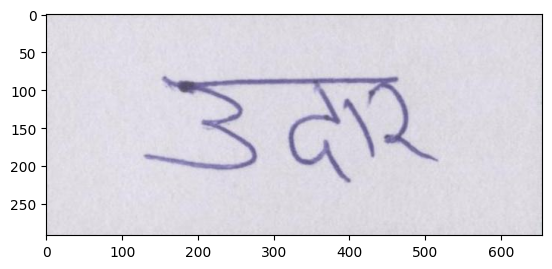

In [ ]:
feature_extractor=ViTFeatureExtractor.from_pretrained(encode)
tokenizer = RobertaTokenizer.from_pretrained(decode)
processor = TrOCRProcessor(feature_extractor=feature_extractor, tokenizer=tokenizer)


def preview(image_path):
    image = Image.open(image_path).convert("RGB")
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    plt.imshow(image)
    print(generated_text)

image_path = "/content/3.jpg"
preview(image_path=image_path)